# Table of Contents
1. [Introduction](#intro)
2. [Conceptual Background](#theory)
3. [Our Model on the Life-Cycle of Human Capital](#our)
4. [Dynamic Programming](#dynamic)
5. [Model Solution](#solution)
6. [Simulation of the Life of an Agent](#simulation)

<a name="intro"></a>
# Introduction
In this tutorial, we are going to apply previous ideas as well as introduce new concepts in order to analyze a particular economic question: How do people make decisions about the timing of education and work over their life-time, and how do macroeconomic forces – such as the interest rate or wage growth – affect this decision? To help us approach this problem, we are going to build a **life-cycle model with human capital accumulation** and solve it with Python using an optimization method called **dynamic programming**. 

Consequently, this tutorial is structured around two main objectives: Firstly, readers unacquainted with the lingo of economic theory will  gain some understanding of how economists go about actually designing a theoretical answer to a particular research question, and how programming can aid in this process. Secondly, readers who already have a passing familiarity with economics will get introduced to a powerful solution technique that helped revolutionize the discipline, but that also finds many applications outside of the social sciences.

<a name="theory"></a>
# Conceptual Background
Before opening our discussions of our life-cycle model with human capital, however, it is worth pausing in order to reflect on a few points that might need some clarification. For example, it might not be intuitively obious to everyone what the point of  economic modelling is in the first place, or even what it is exactly that we mean when we speak of a *model*. Additionally, the notions of both a *life-cycle* as well as *human capital* are  seldomly encountered outside of  economics textbooks. In order to motivate and facilitate our subsequent exposition, this section is therefore  devoted to addressing some these conceptual issues. 

*(Note: Readers only interested in the code, or who already have a background in economics, should feel free to skip this section; no information is stated here that is essential to understanding the code itself.)*

## The Use of Models in Economics
The economy as we observe  today is a highly complex phenomenon: It emerges from the interaction of all the 7.5 billion people who inhibit our planet, the vast number of firms employing them to produce the goods and services they consume, as well as the various governments of all levels that act both as regulators and market participants. Attempting to make sense of the aggregate behaviour of such a large-scale system driven by many micro-decisions might  seem discouraging, if not futile. At the same time, however, there are also many empirical observations about the economy and human decision making that are quite stable over space and time: For example, as a good becomes more expensive, people generally buy less of it; stock returns are for the most part unpredictable; most people acquire their education when they are young and work when they are older, and so on. This fact suggests that, even if we are unable to offer an explanation for every single phenomena of economic life, there *do* exist underlying relationships that we can try to understand with the goal of informing our policy as well as individual decisions.    

Economists use models in order to make sense of such *stylized facts* about the world. Broadly, a model can be understood as 
>[...] a human-made **(abstract) simplification of (observational) reality** that is used to understand, define,
quantify, visualize, or simulate a part or feature of  reality.

This is a point worth repeating: A model is by design a simplification of reality, but under no circumstance is it a perfect image of reality itself. For even if it were possible to devise such a model that perfectly represents  reality – which it is not –  the inherent complexity of such a model would render it useless to a decision maker who wishes to inform a very narrow question. *(To illustrate this point, the Argentinian author Jorge Louis Borges (1899 – 1986) in his short-story "Del rigor en la ciencia" [(1946)](https://kwarc.info/teaching/TDM/Borges.pdf) imagined an empire in which cartography was perfected to such an extent that the map (or "model") of the empire was as large as its whole territory – only to be abandoned as a useless relic by latter generations!)* Instead, a model is supposed to be sufficiently rich in its structure  that it captures the essential mechanism(s) that need to be taken into account in order  to understand a  particular phenomenon, but not more. Consequently, the simplifications and assumptions that underpin a model should also be evaluated in this light. 

In economics, models usually take the form of mathematical equations that describe, and optimally have testable implications about, relationships between economic variables. However,  economic models can also be designed to articulate  decision problems that are not obviously related to the subject matter of economics. For example, while the model of the  [Federal Reserve Bank of New York (2013)](https://www.newyorkfed.org/medialibrary/media/research/staff_reports/sr647.pdf) focuses on the classical problem of macroeconomic forecasting and policy analysis that most people would intuitively associate with economics,  [Becker and Murphy (1988)](https://www.journals.uchicago.edu/doi/abs/10.1086/261558)  develop a model which rationalizes addictive behaviour among individuals. This variety stems from economics as a discipline being first and foremost an "apparatus of the mind, a technique of thinking" that is not defined by a particular subject domain, as the famous economist John Maynard Keynes (1883 – 1946) [once put it](https://opentextbc.ca/principlesofeconomics/chapter/1-3-how-economists-use-theories-and-models-to-understand-economic-issues/). In other words, it is *how* economists model problems that make economics a distinct discipline. 

Consequently,  countless number of economic models  have been written so far, and  there are possibly just as many  ways to classify them, depending on the particular modelling choices one wishes to contrast. One possible (non-exhaustive) classification that is useful in our context emphasizes the incorporation of *time* into a model: 
* **Static** models  do not incorporate a time dimension into their structure.
* **Dynamic** models do incorporate a time dimension, usually by introducing difference or differential equations into the mathematical equations that describe the model. They can be further grouped into *Infinite Horizon*, *Overlapping Generations* and *Life-cycle* models.  

The distinction that is   introduced here  is that some economic models – namely,  dynamic ones – are better suited to describe the behaviour of variables over time, instead of   merely suggesting static cause-and-effect relationships between variables without describing the dynamic process by which these relationships play out. For example, while a static model might tell us that a positive interest rate shock of $X\%$ will decrease economic output by $Y\%$ at some indeterminate point in time, a dynamic model would  illustrate how economic output evolves quarter-by-quarter until the effect of the interest rate increase peters out. (The former type of analysis is also called *comparative statics* in economics-speak, as an aside.) Understanding the dynamic structure of a relationship or decision process can be useful in many contexts: For example,  projecting out the dynamic impact of a particular policy intervention is of immeasurable value to a politican, to whom it obviously makes a huge difference whether a policy will work in one or only in ten years.  

This benefit of a richer structure, however, comes at the cost of less tractability, as dynamic models have the drawback of being mathematically more involved and require more sophisticated solution techniques. To solve and simulate such models, in fact, programming methods are often used.     

## Some Terminology: Human Capital and the Life-Cycle
An important component of any economic model is the assortment of hypothetical agents that populate  the model. These agents – such as individuals, firms, governments, or even entire countries – are postulated to work toward achieving a particular objective, such as  maximizing profits in the case of firms. They are endowed with resources and take actions that are in some sense "optimal" for fulfilling this objective, subject to constraints on the information, resources and abilities they have. All these properties of the agents are expressed through the equations and assumptions that describe a model. 

In the model that we are going to analyze, the objective of our agent will be  to maximize the discounted sum of her earnings over the whole **life-cycle**. By specifying that the agent optimizes over her life-cycle, we emphasize that the agent is aware that her actions in the present will  have repercussions for her future and *finite* life, and that she takes this fact into account when making decisions. Furthermore, this circumstance  will  result in a behavioural pattern that is connected to what we, the physical embodiment of what our imaginary agent is supposed to represent, would  recognize as the agent's  life stages. 
  

Additionally, our agent will be endowed with time, and her feasible actions that she will be able to choose from in any given period is to allocate this time to one of two activities: Going to school or renting out her labour to a firm. While the former increases her **human capital**  and thereby enhances the agent's *future* earnings potential, the latter  brings in earnings *immediately*; a situation that generates  a trade-off that our agent will have to resolve in light of her desire to maximize the totality his discounted earnings.

To better appreciate why schooling increases future earnings potential, we might briefly consider the following definition of human capital as

>*Any stock of knowledge or characteristics the worker has (either innate or acquired) that contributes to his or her productivity.*

In other words, human capital can be best understood as all those *personal* attributes that make a person productive at work, such as particular technical skills, cognitive ability, physical qualities or character traits. In an economic model of production, human capital is usually treated as an input to a production process, similar to physical capital such as machines or buildings. Unlike  its physical counterpart, however, human capital is specific to the person who possesses it and cannot be transferred. Furthmore, the process by which human capital is formed is  more nebulous and less straightforward compared to the case of, say, a specific machine. One common assumption that we will also make, however, is to assume that at least *some* components of human capital can be acquired through schooling.  Therefore, agents are assumed to be able to affect their productivity through their schooling and training decisions, which in turn influences the wage employers are willing to pay. (An opposing argument that is sometimes made, on the other hand, is that schooling is merely a tool that people use to *signal* the skills they already possess. In this interpretation, schooling does not make people more productive.)

<a name="our"></a>
# Our Model on the Life-Cycle of Human Capital

After this brief detour to the world of economic modelling, we are going to introduce our own model. Remember that its purpose is to try to explain why people allocate their life-time between education and work the way they do. For example, why is it that people usually go to university immediately after they complete school, when they might also decide to work for a few decades first? And how might this pattern change, for example, if the growth rate of wages were to increase?

In order to analyze such questions, our model studies the behaviour of a single hypothetical person. Intuitively, this person can spend time at school in order to increase her future income, but at the cost of foregoing her current income. *(Note: We adopt the convention of labelling the agent as female, although this distinction is irrelevant.)*  This is  a decision that of course we all face in our lives. What the model captures, however, is that this is a decision that we have to make not only in our youth, but in *all* years of our life, as we are *always* free to change our employment status (well, we can at least  try to!). Our agent's objective will be to maximize her discounted life-time income. 

This latter point might not be strictly true for how people behave in the real world; after all, there are many other factors that people value in their life other than just how much money they make. For example, having a career that is meaningful and/or leaves time for leisure  is probably just as important to most people, if not even more so. However, introducing such subtleties would make our  model more complicated than it already is, so we simply "assume them away". If we were to believe such factors to be crucial to understanding the question at hand, however, we might want to extend our basic model to take them into account. 

A more formal description of our model is the following: 

## Model Description

1. Time evolves discretely, *(Action only occurs at distinct, separate points in time.)*
* The agent is alive for *J* periods (or "years"), where $J$ is a natural number larger than 0. *(With respect to the previous point, action occurs exactly  at each of these periods. Also,  sometimes we will use the more common $T$ instead of $J$, but the meaning will be the same.)* 
* In each period, the agent is  endowed with one unit of time. 
* The unit of time can be allocated to one of two activities: (a) full-time school or (b) full-time work. The agent's decision is denoted by a dichotome variable $s$: $s=1$ indicates the agent allocates her time  to schooling, $s=0$ indicates the agent going to work.   
* When in school ($s=1$), the agent accumulates human capital, whose value in period $j$ is denoted by $h_j$. 
* When working ($s = 0$), agents rent out their human capital at the wage $w_j$, such that her total earnings for that period amount to $w_j \cdot h_j$
* The agent discounts future earnings  by discount factor of $\frac{1}{1+r}$, where $r > 0$ is the interest rate. *(By discounting, we mean that she prefers to receive income in the present rather than in the future, for a given nominal income. The larger the discount factor, the strong is her preference towards the  presence. There is  a mathematical arbitrage argument that can be applied to demonstrate why income is more valuable the sooner it occurs; however, it should also make intuitive sense that  such preferences are innate to people.)*
* The agent's goal is to maximize her discounted sum of life-time earnings. 
* The wage rate $w_j$ increases exogenously over time according to the formula: $$w_j=(1+\gamma)^{j-1}, \quad \gamma \geq 0$$ where $\gamma$  is a parameter that regulates the magnitude of the growth rate. 
* Human capital  grows from period-to-period according to the formula: $$h_{t+1}=h_t+(h_t \cdot s)^\alpha, \quad \alpha \in (0,1)$$ where $\alpha$ determines the magnitude of the growth rate of human capital allocation. *(Note that when the agent goes to work $(s=0)$, human capital remains flat: $h_{t+1}=h_t$.)*
* The value of being alive in period $J+1$ is zero. 

This completely describes, or formalizes, our model. In the following, we are going to *solve* it; that is, determine the sequence of schooling decisions that our hypothetical agent should make in order achieve her objective of maximizing her discounted life-time income. This should give us some insight into how the agent – and, maybe, *real* people – trade-off current income versus future income potential. 

Before doing so, however, we briefly want to spend some time visualizing the wage and human capital  functions under points (9) and (10). This should help facilitate their economic interpretation and, of course, serve as an opportunity  to refresh and extend our knowledge of Python's plotting capabilities.

## Wage Function
First, we plot the wage function $$w_j=(1+\gamma)^{j-1}$$ for different values of $\gamma$. The two key points to take away in terms of economic intuition are that: 

* For any *given* value of $\gamma$, the wage increases exponentially over time. 
* Across *different* values for $\gamma$, the wage increases in  $\gamma$ for any given time period.

This smoothly increasing function is intended to be a reflection  of how the economy-wide wage level evolves in the real world.  

The below code produces our plots:

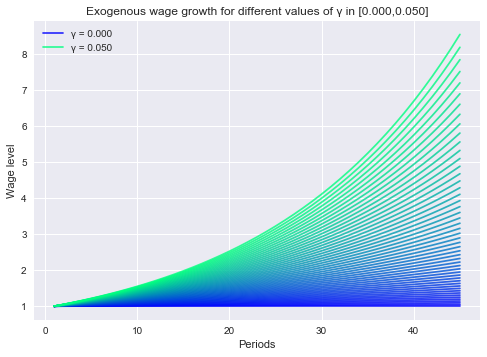

In [12]:
import matplotlib
from matplotlib import colors
import matplotlib.pyplot as plt
import numpy as np
matplotlib.style.use('seaborn')

# Define wage function
def w(γ,j):
    return (1+γ)**(j-1)

# Define a range of periods for the life cycle
J = 45
periods = range(1,J+1)

# Define values of γ for which we want to test the function
γs = np.linspace(0,0.05)

norm = colors.Normalize(vmin=γs.min(), vmax=γs.max(), clip=False) 
#this needs further explnation of how this works. 

# Iterate over all values of γs
for γ in γs:
    # Generate a sequence of wages over the life cycle
    wages = []
    for j in periods:
        wages.append(w(γ,j))
    
    # Display label only for min and max γ
    if γ == γs.min() or γ == γs.max():
        mylabel = 'γ = {:.3f}'.format(γ)
    else:
        mylabel = None
    
    # Plot graph 
    plt.plot(periods, wages, label=mylabel, alpha=0.8, color=plt.cm.winter(norm(γ)))

plt.title("Exogenous wage growth for different values of γ in [{:.3f},{:.3f}]".format(γs.min(), γs.max()))
plt.xlabel("Periods")
plt.ylabel("Wage level")
plt.legend()
plt.show()

The plot shows the evolution of the wage level for  different levels of $\gamma$, which we have constrained to lie between 0 and 0.05. As can be seen from the plot, the wage level is substantially higher for all periods of time for $\gamma = 0.05$ compared to the case of $\gamma = 0.0$. 
Calling on the wage function, which we have defined as 
```Python
def w(γ,j):
    return (1+γ)**(j-1)
```
we can explicitly calculate the difference in magnitude between the two extreme cases at the end of the 45 periods as:

In [13]:
(w(0.05, 45) - w(0.0, 45))/w(0, 45)

7.557150279516975

which indicates that, at the end of the 45 years, the wage level is fully *7.5 times as high* when the growth rate was a consistent $5\%$ compared to the case of no growth at all. This result, which is driven in some part by the power of compounding,   shows just how  important robust wage growth is for elevating the income of workers in the economy. 

For those interested in the details of the code, the next section includes a brief description thereof. Other readers might want to skip ahead to the  description of the human capital function. 

### Technical details
To make the plot, our strategy is create a different array for each value of $\gamma$, each  containing the  wage level in each period of time that our plot shows. 

After importing the libraries that we will need, we   define the function that outputs the wage as a function of the time period and the $\gamma$ level.  Then, we create a sequence of integers that represent  the time periods from 1 up to $J$ using the `range` function.  Having done so, we create an array containing the $\gamma$'s we want our wage function to take on using numpy's `linspace` function: This creates (by default) a sequence of 50 equally spaced numbers within the given boundaries of $0$ and $0.05$, including the endpoints.  

In order to achieve incremental change in color across lines that we see in the plot, we  create a function *norm*  using `norm = colors.Normalize(vmin=γs.min(), vmax=γs.max(), clip=False)`. This function will place a given value that is within the boundaries that are supplied through `vmin`and `vmax` into  a $[0,1]$ interval, depending on the distance to the boundaries. For example, a value that is halfway between the boundaries might output the value $0.5$; a slightly larger value might output $0.52$ and so on. This will be handy when want to assign similar but slightly different colors to lines corresponding to $\alpha$ values that are very close to each other. For that, we will use the *sequential* colormap `winter` – which is a color map that is monotonically changing in its appearance – and determine a specific color through the norm that each $\alpha$ returns, which ensures that $\alpha$'s close to each other return similar colors.  

The final ingredient is the two-fold iteration: We loop over all the  gamma values and for each create an empty list `wages`, to which we then, by means of another loop over the time periods, append the wage level corresponding to each time period.   After the conclusion of this second iteration, but still inside the first one, we then  test the condition whether the gamma that  was used in this iteration coincides with either the smallest or largest of the gammas in the array. If so, we create a string `mylabel` that we will use for the legend in the plot; else, `mylabel` takes on the value `None`. Still in the first iteration, we then plot `wages` with the appropriate label and assign a color as explained before. The initial loop then proceeds to the next value for $\gamma$. Finally, when the loop is finished, we proceed to show the complete plot, which is built from all the individual plots that were created in the loop together with the appropriate title and labels.

## Human Capital Function
We repeat the same exercise as before, but for the human capital function. Given that we are analyzing a different equation, the parameter that we will toggle this time is not $\gamma$, but $\alpha$, which, however, plays a very similar role in the human capital equation: 

$$h_{t+1}=h_t+(h_t \cdot s)^\alpha, \quad \alpha \in (0,1)$$

which states that the level of human capital between periods increases by  $(h_t \cdot s)^\alpha$. It is obvious from this formulation that the higher $\alpha$ is, the more human capital increases from one period to the next. $\alpha$ is therefore also referred to as the *curvature* of the human capital function.  Giving it a more economic meaning, we might loosely interpret it as something akin to the "return to schooling". 

Our plot will be essentially be the same. This time, however, we introduce a discontinuity in some arbitrary period $T$, from which onwards we will assume that human capital does not grow further because the agent no longer goes to school (i.e. $s = 0$ for all periods after $T$ in the equation). However, note that our determination of what value $s$ takes in which period is completely arbitrary and only serves to illustrate how the human capital function behaves for different choices of its parametrization. In particular, it does *not* have to be the case that the going to school up to period $T$, and not thereafter, is any sense an optimal decision sequence for our agent.

We beginn by illustrating our code for a fixed $T = 10$ but varying $\alpha$, and will make the plot more elaborate by  comparing the human capital function for different choices of both $T$ *and*  $\alpha$.

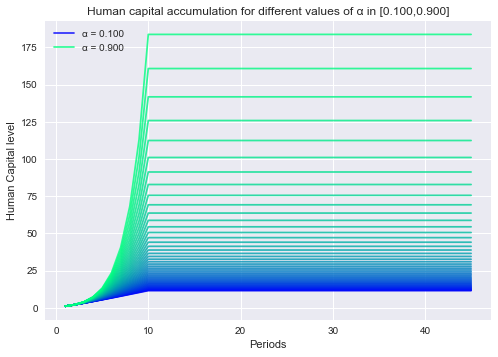

In [14]:
# Define human capital accumulation function
def h_tw(α, h_td, s):
    return h_td + (h_td*s)**α

# Define schooling sequence
last_schooling_period = 10

schooling_sequence = []
for p in periods:
    if p <= last_schooling_period:
        schooling_sequence.append(1)
    else:
        schooling_sequence.append(0)

# Define values of α for which we want to test the function
αs = np.linspace(0.1,0.9)

norm = colors.Normalize(vmin=αs.min(), vmax=αs.max(), clip=False)

# Iterate over all values of αs
for α in αs:
    # Generate a sequence of human capital over the life cycle
    HKs = [1] # Normalise initial human capital to 1
    for j in range(1,J):
        HKs.append(h_tw(α,HKs[j-1],schooling_sequence[j]))
    
    # Display label only for min and max α
    if α == αs.min() or α == αs.max():
        mylabel = 'α = {:.3f}'.format(α)
    else:
        mylabel = None
    
    # Plot graph 
    plt.plot(periods, HKs, label=mylabel, alpha=0.8, color=plt.cm.winter(norm(α)))

plt.title("Human capital accumulation for different values of α in [{:.3f},{:.3f}]".format(αs.min(), αs.max()))
plt.xlabel("Periods")
plt.ylabel("Human Capital level")
plt.legend()
plt.show()

As the plot shows, the level of the agent's human capital is increasing exponentially in $\alpha$. In particular, observe that the increments between the different lines get larger as  $\alpha$ becomes larger. 

Economically, the convexity of the human capital function up to period 10 could signify increasing returns to schooling – i.e. building on the previously gained knowledge, each year even more skills can be acquired than was possible beforehand. Such an assumption does not seem completely unreasonable: After all,  simply knowing how to read  probably does not make one marginally more productive than the skills  that can be acquired from *actually* reading, say, programming tutorials. However, one could, of course, also assume the opposite position and  argue that acquiring  the academic basics induces the largest increases in human capital, and all the specialized knowledge that is gained thereafter is not really *that* useful for being productive at work, in which case the human capital function were concave. *(This is a dispute that we will leave open to the reader as an exercise in philosophy.)*   

As the code is essentially the same as for the wage equation, we will leave out the technical details and move right on  to showing the plot for different values of the discontinuity. 

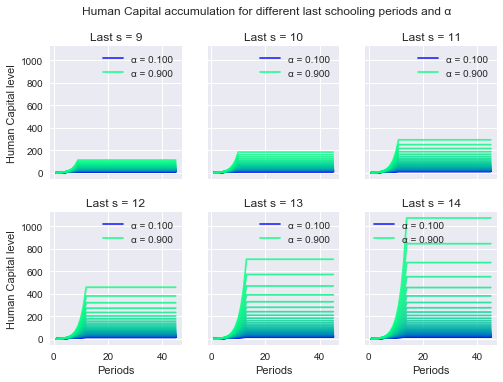

In [15]:
# Define figure with subplots
f, axarray = plt.subplots(2, 3, sharey=True)
f.suptitle('Human Capital accumulation for different last schooling periods and α')

# Dictionary with last schooling period and subplot postiton
positions = {}
positions[9] = [0,0]
positions[10] = [0,1]
positions[11] = [0,2]
positions[12] = [1,0]
positions[13] = [1,1]
positions[14] = [1,2]

# Define values of α for which we want to test the function
αs = np.linspace(0.1,0.9)

norm = colors.Normalize(vmin=αs.min(), vmax=αs.max(), clip=False)

sample = []
# Iterate over last schooling period
for lsp, auxp in positions.items():
    # Define schooling sequence
    last_schooling_period = lsp

    schooling_sequence = []
    for p in periods:
        if p <= last_schooling_period:
            schooling_sequence.append(1)
        else:
            schooling_sequence.append(0)

    # Iterate over all values of αs
    for α in αs:
        # Generate a sequence of human capital over the life cycle
        HKs = [1] # Normalise initial human capital to 1
        for j in range(1,J):
            HKs.append(h_tw(α,HKs[j-1],schooling_sequence[j]))
        
        # Display label only for min and max α
        if α == αs.min() or α == αs.max():
            mylabel = 'α = {:.3f}'.format(α)
        else:
            mylabel = None

        
        # Plot graph 
        axarray[auxp[0],auxp[1]].plot(periods, HKs, label=mylabel, alpha=0.8, color=plt.cm.winter(norm(α)))
    
    axarray[auxp[0],auxp[1]].legend()
    axarray[auxp[0],auxp[1]].set_title("Last s = {}".format(lsp))

# Set x and y labels
for ax in axarray.flat:
    ax.set(xlabel = 'Periods', ylabel = 'Human Capital level')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarray.flat:
    ax.label_outer()

# Increase separation between plots
f.subplots_adjust(hspace=0.25)

plt.show()

What this panel of plots shows is that what is true for the level of $\alpha$ is also true for the length of schooling: Namely, that increases in the number of years spent at school induces disproportionately large increases in the level of human capital. Focusing on the highest line in each plot with $\alpha = 0.9$, for example, it is visible that human capital ends up being around *ten times* as high when the agent goes to school for 14 rather than 10 years. In addition to that, it is also apparent that the incremental increase in the terminal level of human capital from one $\alpha$ value to the next higher is also  increasing in the number of years spent at school. This is also due to the convexity of the human capital function. 

This concludes our model description. We will close this section by describing some of the technical details behind the last code block, which disinterested readers are, as always, free to skip in order to move right on to the model solution. 

### Technical details 
The first line in this code block initializes a figure `f` and the array of subplots `ax`, which is instructed to provide space for two rows and three columns of subfigures, which are six subfigures in total. (```sharey = True``` indicates that the subfigures should have the same y-axis.) `f.suptitle(...` simply creates a subtitle that is common across the whole figure. 

Next, we create a dictionary with the positions of the subplots as values, the use of which will become apparent shortly. The  keys corresponding to the values are  the number of schooling years. For example, the first entry assigns the (numeric) key *9* – as in 9 years –  to the list *[0,0]* – as in first row and first column of the subfigure array (which, due to the peculiar indexing convention of Python, is indexed as  [0,0].) Subsequently, the figure in which the terminal schooling period is 9 will be placed into the first row and first column of the array. 

What is novel in the subsequent code is how the plots are actually placed into the grid, for which we need the dictionary. We exploit the fact that the `item()` method, applied to a dictionary, returns the (key, value) pair for each entry. Therefore, in one and the same iteration in which we  assign the terminal schooling period  needed to create each individual plot by the same procedure as before (`last_schooling_period = lsp`, where `lsp` is the *dictionary key* assigned to that iteration's entry), we can directly use the *value* of the dictionary entry to place it in the appropriate subfigure using `axarray[auxp[0],auxp[1]].plot(...`, where `auxp` is the value of that dictionary entry in that iteration. (Remember that `auxp` returns a list, so `auxp[0],auxp[1]` returns the first two values of that list, which we specified to be the coordinates of the subfigure.) 

This subtlety is already sufficient to create this more elaborate grid of plots: As you can convince yourself of, the rest of the code is essentially the same as before, with some modifications to the overall figure at the end that are so labelled in the code.

<a name="dynamic"></a>
# Dynamic Programming

*(Note: Thie discussion and notation follow the exposition of the mathematical appendix of [Wickens' (2008) Macroeconomic Theory: A Dynamic General Equilibrium Approach](http://www.edu.gber.ge/uploads/files_62_1.pdf). The first three chapters of [Adda and Coopers's (2003) Dynamic Economics: Quantitative Methods and Applications](https://mitpress.mit.edu/books/dynamic-economics)  also informed some comments.)*

As discussed, our agent's goal is to maximize her discounted sum of life-time earnings by selecting an optimal  sequence of schooling and working. This is not a trivial decision, however, because the return to working  depends on the agent's human capital, which is itself governed by previous schooling choices. She therefore has to strike a balance between increasing her future earnings potential through schooling and actually earning something through working. This trade-off makes it apparent that, given a parametrization of our model that is not wholly pathological, a naïve policy of *always* selecting either one of the two feasible actions will fail to strike this balance. Instead,  for maximization of  discounted life-time earnings to be achieved, the agent has to solve her optimization problem explicitly.

In mathematics, such a problem of constrained multi-period optimization falls into the domain of **dynamic optimization**, of which we will give a brief outline. Our goal is to  introduce the concepts of *backward induction* and the *principle of optimality*, respectively. Hopefully, this will have the effect of making the subsequent discussion of our code more intuitive. 

## Formulation of the  Problem 
As the name already implies,  dynamic optimization is concerned  with finding the solution to the optimization of  an objective function, call it $V$, that is defined over multiple time periods and subject to constraints, at least one of which is dynamic. By dynamic, we mean that it is expressed either as a difference or a differential equation, depending on whether time is discrete or continuous. Of course, dynamic optimization is a major field  in its own right and in order to keep our discussion somewhat contained, we will limit ourselves to studying the simple case when

* time is  **discrete**
* the time horizon is **finite**, with $T$ periods
* and the model is entirely **deterministic**.

Additionally, we assume that the objective function to be maximized is additively separable and takes  the form of 
$$ V(z_0, z_1, \ldots, z_T; x_0, x_1, \ldots, x_T) = \sum_{t=0}^T \beta^t f(z_t, x_t), \quad \text{with } \beta \in (0,1)$$  and that the variables $x$ and $z$ are linked by a difference equation $$x_{t+1} = g(x_t, z_t)$$

These restrictions reduce the general problem  to finding numbers $\{z_i^*, x_i^*\}_{i = 0}^T$ such that $V$ is maximized.

Before moving on to giving an interpretation of the problem, we want to briefly observe  that the objective function $V$ in period 0 (and in any other period, for that matter) can also be formulated recursively as

$$\begin{align}
    V(z_0, z_1, \ldots, z_T; x_0, x_1, \ldots, x_T) &= f(z_0, x_0) + \beta f(z_1, x_1) + \beta^2 f(z_2, x_2) + \ldots + \beta^T f(z_T, x_T)\\
     &= f(z_0, x_0) + \beta \left(\sum_{t=1}^T \beta^{t-1} f(z_t,x_t) \right)  \\
     &= f(z_0, x_0) + \beta V(x_1, \ldots, x_T; z_1, \ldots, z_T)
    \end{align}$$
 
which can be written more parsimonously as $$V_0(z_0,x_0) = f(z_0, x_0) + \beta V_1(x_1)$$ where the subscripts indicate the period the argument starts from. In words, this formulation makes the point that the value of the objective function in any period is the sum of the value from the current period's decision and the discounted value of the decision sequence from the next period onwards. We will need this recursive formulation later on, so keep it in the back of your mind. 
 
## Interpretation of the Problem
The restriction on the functional form of $V$ might seem oddly specific at first. However, it simply describes the situation when the objective function represents the present value of a "pay-off" stream that is described by another function $f$, discounted by a  factor of $\beta := \frac{1}{1+r}$, where $r$ is the interest rate. This formulation applies to many problems in economics, including our own, in which $f$ is the earnings function agumented by an indicator variable that indicates the employment status of our agent, i.e:

$$ f(s_t; h_t) =  \begin{cases}
h_t \cdot w_t & \text{for }s = 0\\  
0    & \text{for }s = 1
\end{cases}$$
 
 Another point that is important to appreciate about the objective function is the meaning of its argument $z$  and the parameter $x$:

* $z$ is called the  **control** variable and $z_t$ is its value in period $t$. The control variable is the variable whose value is chosen by the optimizer. In our model, it is the employment status of the agent.
* $x$ is called the  **state** variable and $x_t$ is its value in period $t$. The state variable represents information that is sufficient to determine the dynamics of the system. It is indirectly determined by the optimizer through the control variable, as the the two are linked by the the constraint $x_{t+1} = g(z_t, x_t)$. However, the initial value of the state variable $x_0$ is assumed to be given and not subject to influence. In our model, the state variable is the human capital stock of the agent. 

In economics, it is often the case that the state variable is a stock variable, such as the capital stock of a country or the wealth of a consumer, and the control variable is a corresponding flow variable, such as  investment or consumption levels, respectively. Toghether, the state and control variable then "describe" the economy. Furthermore, in more elaborate models the state variable will usually be subject to stochastic, or random, fluctuations in its value. 
    
## Dynamic Programming Approach
Under some assumptions on the specific formulation, this problem will have a unique solution. In our case, this means that there  exists   a unique sequence of schooling decisions $s$ that maximizes the agent's discounted sum of earnings; finding this  sequence is in many ways the core of this tutorial.

In general, there are different strategies that can be used to derive the solution, some of which will work better for a particular problem under study. We will use  the dynamic programming approach to do so,  which relies on the **principle of optimality**. The principle of optimality, due to [Bellman (1957)](https://www.rand.org/content/dam/rand/pubs/papers/2008/P550.pdf), states that
> *"An optimal policy has the property that whatever the initial state and initial decision are, the remaining decisions must constitute an optimal policy with regard to the state resulting from the first decision."* 

In other words, an optimal decision sequence (where a decision is the choice of a value for the control variable $z_t$) has the property that *any decision at any point in time* has to be optimal with regard to future periods, irrespective of previous decisions and realizations of the state variable.  That is, the decision in the terminal period $T$ has to be optimal for *that* period, given the state variable in period $T$; the decision in the second-last period $T-1$ has to be optimal for that period *as well as* period $T$, given the state variable in period $T-1$;  and so on. When we say that the decision has to be optimal in any given period, we equivalently mean that is has to maximize the objective function from that period onwards. 

Given the recursive structure of the objective function that we have derived above,  a mathematical way to express the same idea is to state that an optimal sequence of decisions $\{z_i^*\}_{i = 0}^T$ has to fulfill the condition that 

$$ V_t = \max_{z_t} \left \{ f(z_t,x_t) + \beta V_{t+1}(x_{t+1}) \right \}, \quad \forall t \in \{0,1,\ldots,T\}$$

The point of dynamic programming is to find this optimal sequence of control variables by beginning with finding the decision that optimizes the last period's objective function, which is relatively easier because in the last period, we face a static and not a dynamic optimization problem. However, because we do not yet  know the value of the state variable in period $T$, this will only yield the  optimal decision as a function of the state variable at time $T$ and not an explicit value for the control variable. We can, however, substitute this solution into the optimization problem of the second-last period, which will then become a static optimization problem as well, because the optimality of the last period's decision is already ensured through the substitution.  Continuing this backwards substitution  we reach the first period, whose optimal decision is only contingent on the *given* initial value of the state variable. Once we have thereby determined to optimal decision in the first period, this process will yield the optimal decision path for *all* periods. This procedure of beginning  the optimization with the last period and working backwards is also called [**backward induction**](https://en.wikipedia.org/wiki/Backward_induction), and this is the solution that we will implement with our code in the next section. We will do so in two parts: First, we are going to implement a solution that *literally* follows the principle of backward induction. Afterwards, we will devise a slightly different version that is better in its performance. 

A last point that is worth mentioning: Where does the symbol for the objective function come from? In the dynamic optimization literature, $V$ stands for *value function*. Perhaps confusingly, however, the objective function and the value function are not exactly the same things. Rather, the value function is the *optimized* version of the objective function, i.e. the objective function evaluated at the optimal decision sequence from some period $t$ onwards. It describes the value that accrues to the decision maker from pursuing the optimal – and not just any other – sequence of decisions.

<a name="solution"></a>
# Model Solution 
Now that we have mastered the theory we want to implement the theory into code. 
Our first approach will be one where we solve the model recursively. 

## Naive Dynamic Programming Approach

In [16]:
from numba import jit

r = 0.04 # Interest rate
γ = 0.001 # Rate of exogenous wage growth
α = 0.7 # Curvature schooling returns

def w(j):
    return (1+γ)**(j-1)

# Optimise function
w = jit(w)

def h_tw(h_td, s):
    return h_td + (h_td*s)**α

# Optimise function
h_tw = jit(h_tw)

#Dynamic programming solution 
def value_function(h_td, j, J):
    if j == J: # Last period
        return h_td*w(j)
    else:
        # No school
        aux_value_NO = h_td*w(j) + ((1/1+r)*value_function(h_tw(h_td,0), j+1, J))
        
        # School
        aux_value_YES = ((1/1+r)*value_function(h_tw(h_td,1), j+1, J))
        
        if aux_value_YES >= aux_value_NO:
            return aux_value_YES
        else:
            return aux_value_NO
        
# Optimise function
value_function = jit(value_function)

value_function(1,1,10)

121.91233664065386

Again we define specific model parameter values for $r,\gamma,\alpha$. After that we redefine our wage accumulation function such that we only have one input. The equivalent is done for the HK-accumulation function. 
In line 17 we then intiate a measuring mechanism to measure the time it takes for our HK-function to execute. Then we create our _naive_ value function which is separated into an if-else statement. 
In case the function receives the last period as an input, it return the final value of our HK-level. In any other case, being one where the period given is not the last one, it calculates the values of HK for two cases. One case, in which we do not assume that the agent went to school, and in another where we do not assume the agent goes to school. In either case we recursively call the value function itself, to repeat the step across many periods. After the code has executed, has solved all the recursively called functions and added their discounted values we receive two auxiliary values for both options. options. After then the computated auxiliary values are computed, an compared, where then the larger value is returned. Note that with each call, there are 2 different calls to the function which each call the function twice. From that one can imagine a huge tree diagram, for all th possibilites. With each period the computations increase by the factor two. This leads us to the question, about whether or not this approach is a good implementation or not. 
We will measure that by looking at the computation time.

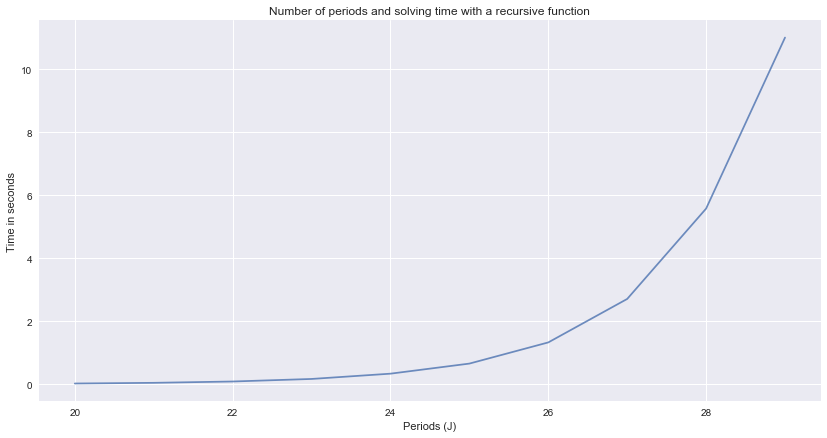

In [17]:
import time

Js = range(20,30)

solve_times = []
for J in Js:
    start = time.process_time()
    value_function(1, 1, J)
    end = time.process_time()
    solve_times.append(end - start)

import matplotlib
import matplotlib.pyplot as plt

matplotlib.style.use('seaborn')

plt.figure(figsize=(14,7))
plt.plot(Js, solve_times, alpha=0.8)
plt.title("Number of periods and solving time with a recursive function")
plt.xlabel("Periods (J)")
plt.ylabel("Time in seconds")
plt.show()

## Dynamic Programming with Discrete State Space
As we have seen, using an approach that relies on a recursive implementation of backward induction  yields an exponentially increasing time to solve the model as more time periods are added. This phenomenon is an example of the **curse of dimensionality**, which describes a situation in  data analysis in which an algorithm applied to a  high-dimensional problem (i.e. a problem with many model features /  parameters / time-periods, etc.) encounters difficulties that are not visible in the same but lower dimensional problem (with fewer features / parameters / time-periods). In our case, the underlying reason for the occurrence of this curse is that each time our value function is called, it has to compute all combinations of possible decision sequences. As more time periods are added, the space of possible sequences becomes disproportionally larger so that the computation time also increases exponentially.   

There is a way to overcome this issue, however, by using an approach that is called **discretization**. Discretization derives its name from the practice of slicing the state space (the set on which  the state variable is defined on) into many "discrete" points. Recall that the problem  that backward induction was trying to overcome was that for any  period larger than one, the value of the state variable is unkown in advance. We were therefore unable to evaluate the value function directly  without  first finding the first-period decision through backward induction.

The point of discretization is now that we simply *assume* that the state variable will take on one of finitely many values. These values are chosen such that they form a fine grid from the lowest to the highest possible value of the state variable that can ever occur within the model (either by the agent always choosing $s=0$ or $s=1$, respectively). Using this grid, we can make calculations with the state variable as if it was a known quantity.  

To see how this works, we describe the procedure in some more detail. In the following exposition, capital letters will refer to vectors and small letters to scalar values. 
1. Define a grid $H$ that contains equally spaced values in the intervall $[h_{min}, h_{max}]$, where $h_{min}, h_{max}$ refer to reasonably small / large values for the state variable, respectively. We will use $n = 501$ points. A finer grid might yield a more accurate solution, but would slow down the algorithm. Conversely, a coarser grid would be faster, but less accurate. 
* Using $H$, compute the value function for the *final* period $T$: Because there would be no point in accumulating human capital in the terminal period, the agent will always want to work, irrespective of the state variable, and the value function will be the product of the (known) wage rate and the assumed levels of human capital. Because our state variable is a whole grid, this calculation  will also yield a grid of values for the value function, call it $V_T$. $$V_T = w_T \cdot H$$ 
* With this array $V_T$, we can initiate a matrix that has $T$ columns and $n$ rows. We fill the the last column with our vector $V_T$. Otherwise the matrix remains empty. 
* Next, we start a loop that iterates through all the $T-1$ empty columns of the matrix  and goes backwards (i.e. it starts from the second last column).  In each column iteration, we initiate a nested loop that iterates through   all rows of $H$. 
* In each column and row iteration, we calculate the the value function for that (row, column) pair of the matrix as follows: (a) Assuming the agent does *not* go to school, the value function will be the product of the (known) wage rate and the level of human capital corresponding to that  row $h$  *plus* the discounted  value function in the terminal period that was calculated based on  the same $h$ (because $h$ remains constant if the agent does not go to school): $$v_{T-1}^{School} = w_{T-1} \cdot h + \frac{1}{1+r} v_T $$(b) If the agent *does* go to school, the value function will be the discounted value function in period $T$. However, in this case $v_T$ will not  *exactly* take the same value as any row in $V_T$, because the array of human capital $H$ that we used to calculate $V_T$ does not reflect that the agent accumulates human capital in period $T-1$ if she goes to school. Therefore, no row in $V_T$ was computed with exactly the same level of human capital that the agent will have accumulated in period $T$ after going to school in period $T-1$. Instead, we *impute*  what the value function in period $T$ would have been with this new level of human capital ($h' = h + h^\alpha$) through *linear interpolation*. We disregard the technical details of interpolation to make the problem not more difficult as it is, but the central point is that  we  supply a vector of  arguments ($H$), a vector of  known output values ($V_T$) corresponding to these arguments and a scalar ($h'$). The interpolation function `np.interp` then imputes what the value of the function corresponding to $h'$ should *approximately* be, based on the known mapping between $H$ and $V_T$. We will use this imputed value $v_T'$ to calculate $$v_{T-1}^{No school} =  \frac{1}{1+r} v_T' $$
* Having done so, we choose $s$ to be $1$ or $0$, depending which of $v_{T-1}^{No school}$ and $v_{T-1}^{School}$ is higher. We can store this decision in a separate decision matrix and the corresponding optimal value for the value function in the corresponding (row, column) position of our matrix that we initiated earlier. 
* The loop than iterates to the next row, and the procedure continues until all (row, column) pairs of our matrices have been filled. 
* In the end, the $(i,j)$-entry in the full decision matrix than tells us the optimal decision  in period $j \leq T$ for a level of human capital corresponding to the $i^{th}$ entry in $H$. To find the optimal decision in $j$ for a level of human capital that does not coincide with a point on the grid, we can simply adopt the decision corresponding to the nearest value of human capital instead. 

It might take some time to properly to digest the details of this procedure, but a key point is that we no longer have to solve the model through complete backward induction every time we call the value function, although the solution that we find is now only an approximation of the exact one.  Additionally, increasing the number of periods in our model by adding one more column to our matrices does not make much of a difference, because each column iteration is computationally approximately equally intensive.  The *discretization* approach therefore overcomes the curse of dimensionality. As we will see below where we simulate the model, the computation time will increase approximately linearly in the number of periods.

In [18]:
r = 0.04 # Interest rate
γ = 0.001 # Rate of exogenous wage growth
α = 0.7 # Curvature schooling returns

<a name="simulation"></a>
# Simulating the Life of an Agent

Now that we have explained an implemented the separate parts of our model we want to combine the parts to finally simulate the life of an agent. That includes simulating the HK-Level the wage level over the total life cycle.

8455.559820762728


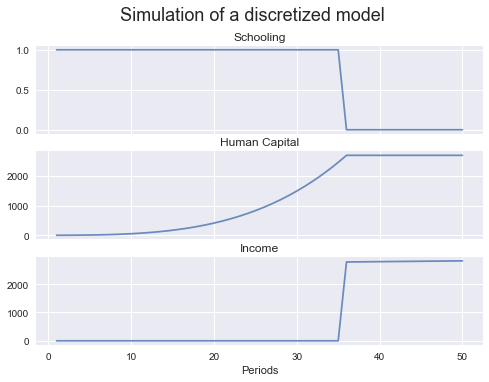

In [19]:
from scipy import interpolate
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

def w(j):
    return (1+γ)**(j-1)

# Optimise function
w = jit(w)

def h_tw(h_td, s):
    return h_td + (h_td*s)**α

# Optimise function
h_tw = jit(h_tw)


J = 50
grid_points = 501
h_start = 1 # Lowest level of human capital
h_end = h_start
for j in range(0,J):
    h_end = h_tw(h_end,1)
print(h_end)
grid_h = np.linspace(h_start, h_end, grid_points)

##########

V = np.empty((J,grid_points)) # Value function
V[:] = np.nan

s = np.empty((J,grid_points)) # Schooling decision
s[:] = np.nan

V[J-1,:] = w(J)*grid_h
s[J-1,:] = 0

for j in range(J-2,-1,-1): # iterates backwards
    # School choice for each h
    for ind, h in enumerate(grid_h):
        # No school
        value_tomorrow = np.interp(h_tw(h,0),grid_h,V[j+1,:])
        aux_NO = w(j)*h + (1/(1+r))*value_tomorrow
        
        # School
        value_tomorrow = np.interp(h_tw(h,1),grid_h,V[j+1,:])
        aux_YES = (1/(1+r))*value_tomorrow
        
        # Choice
        if aux_YES >= aux_NO:
            s[j,ind] = 1
            V[j,ind] = aux_YES
        else:
            s[j,ind] = 0
            V[j,ind] = aux_NO

###


sim_schooling = []
sim_income = []
sim_HK = [h_start]

for j in range(0,J):
    # Schooling
    f = interpolate.interp1d(grid_h, s[j,:], kind='nearest')
    sim_schooling.append(float(f(sim_HK[j])))
    
    # Income
    income = (sim_schooling[j]==0)*w(j)*sim_HK[j]
    sim_income.append(income)
    
    # Human capital next period
    if j < J-1:
        sim_HK.append(h_tw(sim_HK[j],sim_schooling[j]))

        
####
matplotlib.style.use('seaborn')

# Define figure with subplots
f, axarray = plt.subplots(3, 1, sharex=True)
f.suptitle('Simulation of a discretized model', fontsize = 18)

periods = range(1,J+1)

axarray[0].plot(periods, sim_schooling, alpha=0.8)
axarray[0].set_title("Schooling")

axarray[1].plot(periods, sim_HK, alpha=0.8)
axarray[1].set_title("Human Capital")

axarray[2].plot(periods, sim_income, alpha=0.8)
axarray[2].set_title("Income")

# Set x and y labels
for ax in axarray.flat:
    ax.set(xlabel = 'Periods')
# Hide x labels and tick labels for top plots and y ticks for right plots.
for ax in axarray.flat:
    ax.label_outer()
    
plt.show()

The combination of code for these plots are mere duplicates from earlier sections which is why the code explanation part is left out here. Instead we will jump to the economic interpretation right away. 

The top plot, shows that currently the agent goes to school for almost 35 periods, which is the duration during which our HK-level is increasing exponentially. Once schoooling is completed the agent leaves school and works for a starting salary of almost 3000.

This graphic summarizes the connection between the number of schooling periods, the HK level and in the end the salary level.

To refer back to our earlier look at the speed of the model implementation we now want to give a closer look at the speed of this implementation.

In [20]:
def discrete_solution(J):
    # Grid for human capital
    h_end = h_start
    for j in range(0,J):
        h_end = h_tw(h_end,1)

    grid_h = np.linspace(h_start, h_end, grid_points)
    
    # Backwards solve the model
    V = np.empty((J,grid_points)) # Value function
    V[:] = np.nan

    s = np.empty((J,grid_points)) # Schooling decision
    s[:] = np.nan

    V[J-1,:] = w(J)*grid_h
    s[J-1,:] = 0

    for j in range(J-2,-1,-1): # iterates backwards
        # School choice for each h
        for ind, h in enumerate(grid_h):
            # No school
            value_tomorrow = np.interp(h_tw(h,0),grid_h,V[j+1,:])
            aux_NO = w(j)*h + (1/(1+r))*value_tomorrow

            # School
            value_tomorrow = np.interp(h_tw(h,1),grid_h,V[j+1,:])
            aux_YES = (1/(1+r))*value_tomorrow

            # Choice
            if aux_YES >= aux_NO:
                s[j,ind] = 1
                V[j,ind] = aux_YES
            else:
                s[j,ind] = 0
                V[j,ind] = aux_NO
                
    # Simulate the model
    sim_schooling = []
    sim_income = []
    sim_HK = [h_start]

    for j in range(0,J):
        # Schooling
        f = interpolate.interp1d(grid_h, s[j,:], kind='nearest')
        sim_schooling.append(float(f(sim_HK[j])))

        # Income
        income = (sim_schooling[j]==0)*w(j)*sim_HK[j]
        sim_income.append(income)

        # Human capital next period
        if j < J-1:
            sim_HK.append(h_tw(sim_HK[j],sim_schooling[j]))
            
discrete_solution = jit(discrete_solution)

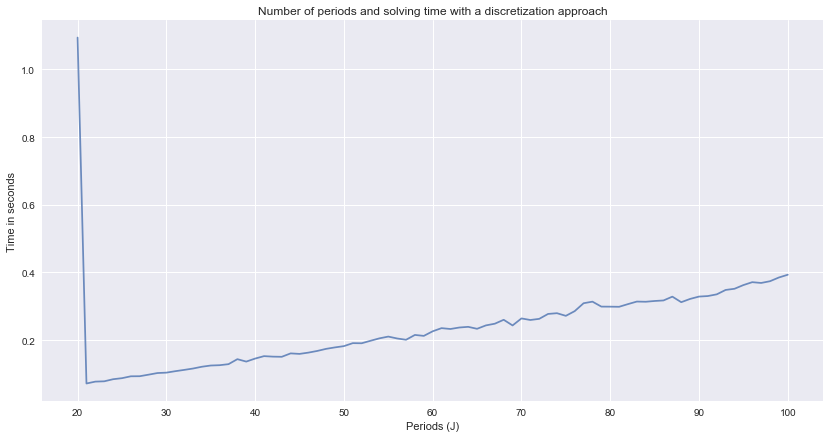

In [21]:
import time

Js = range(20,101)

solve_times = []
for J in Js:
    start = time.process_time()
    discrete_solution(J)
    end = time.process_time()
    solve_times.append(end - start)

plt.figure(figsize=(14,7))
plt.plot(Js, solve_times, alpha=0.8)
plt.title("Number of periods and solving time with a discretization approach")
plt.xlabel("Periods (J)")
plt.ylabel("Time in seconds")
plt.show()

As we see this plot shows a rather linear relationship between the number of periods and the computation time. Why is that you might ask. When we look at the code we see that the less computationally-intensive implementation of the interpolation method is used, which results in a quicker computation time, as the model does not need to be fully solved backwards repeatedly as previously. This is why the idea of discretization is widely used in many applications where one deals with models. 